In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# This is my own customised data preprocessing function
def data_preprocessing(x):
    
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    print('MISSING VALUES')
    print('*'*100)
    print()
    x.info()
    print()

    print('Number of missing values before preprocessing')
    print()
    print(x.isna().sum())
    for i in x.columns:
        if x[i].dtype in ['float64','int64'] :
            x[i] = x[i].fillna(x[i].mean())
        elif x[i].dtype == 'bool':
            x[i] = x[i].fillna(x[i].mode())    
        else:
            x[i] = x[i].fillna( method = 'bfill', axis =0 )
    print()
    print('Number of missing values after preprocessing')
    print(x.isna().sum())
    print()
    print('')

    print('OUTLIERS')
    print('*'*100)
    ind1 = []
    outlier = []
    pure = []
    a = []
    b = []
    for i in x.columns:
        if x[i].dtype in ['float64','int64']:
            q1 = np.percentile(x[i], q = 25, interpolation = 'midpoint')
            q2 = np.percentile(x[i], q = 50, interpolation = 'midpoint')
            q3 = np.percentile(x[i], q = 75, interpolation = 'midpoint')
            iqr = q3-q1
            upper_limit = q3+1.5*iqr 
            lower_limit = q1-1.5*iqr 
            print(f'Quartiles for {i} are: q1:{q1}, q2:{q2}, q3:{q3}' )
            print(f'IQR for {i} is {iqr}')
            print(f'Upper limit is {upper_limit}')
            print(f'Lower limit is {lower_limit}')
            y = []   
            for j in range(len(x[i])):
                if (x[i][j] > upper_limit) or (x[i][j] < lower_limit):
                    y.append(x[i][j])
                    outlier.append(x[i][j])
            if len(y) > 0:
                if len(y)<10:
                    print(f'Outliers for {i} is {y}')
                else:
                    print(f'Outliers for {i} is {y[0:11]} ....')
                index1 = x[i] > upper_limit
                index2 = x[i] < lower_limit
                a.append(x.loc[index1].index)
                b.append(x.loc[index2].index)

                print()
                print('--'*25)
                print()
            else:
                print('There are no outliers')
                print()
                print('--'*25)
                print()
#     print(f'The outliers in this data set is {outlier}')
#     print()
#     print('--'*100)
#     print()
    # For getting the indices that are to be deleted
    for v in range(len(a)):
        for g in range(len(a[v])):
            ind1.append(a[v][g])
    for v in range(len(b)):
        for g in range(len(b[v])):
            ind1.append(b[v][g])
    ind1 = list(set(ind1))
#     print()
#     print('--'*100)
#     print()
    print(f' The no of rows  that are to be deleted are {len(ind1)}.')
    print()
    print('--'*100)
    print()
    x.drop(index = ind1, inplace = True)
    
#     print(x)
    
    x.set_index(np.arange(1,x.shape[0]+1),inplace = True)
    
    print(x)
    
#     print(x.shape[0])

In [3]:
# Importing Data Frame
df = pd.read_csv('E:\\Downloads\\USA_Housing.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
# Data Preprocessing (Here the outliers have been removed)
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
data_preprocessing(df)

MISSING VALUES
****************************************************************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB

Number of missing values before preprocessing

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Pop

<function matplotlib.pyplot.show(close=None, block=None)>

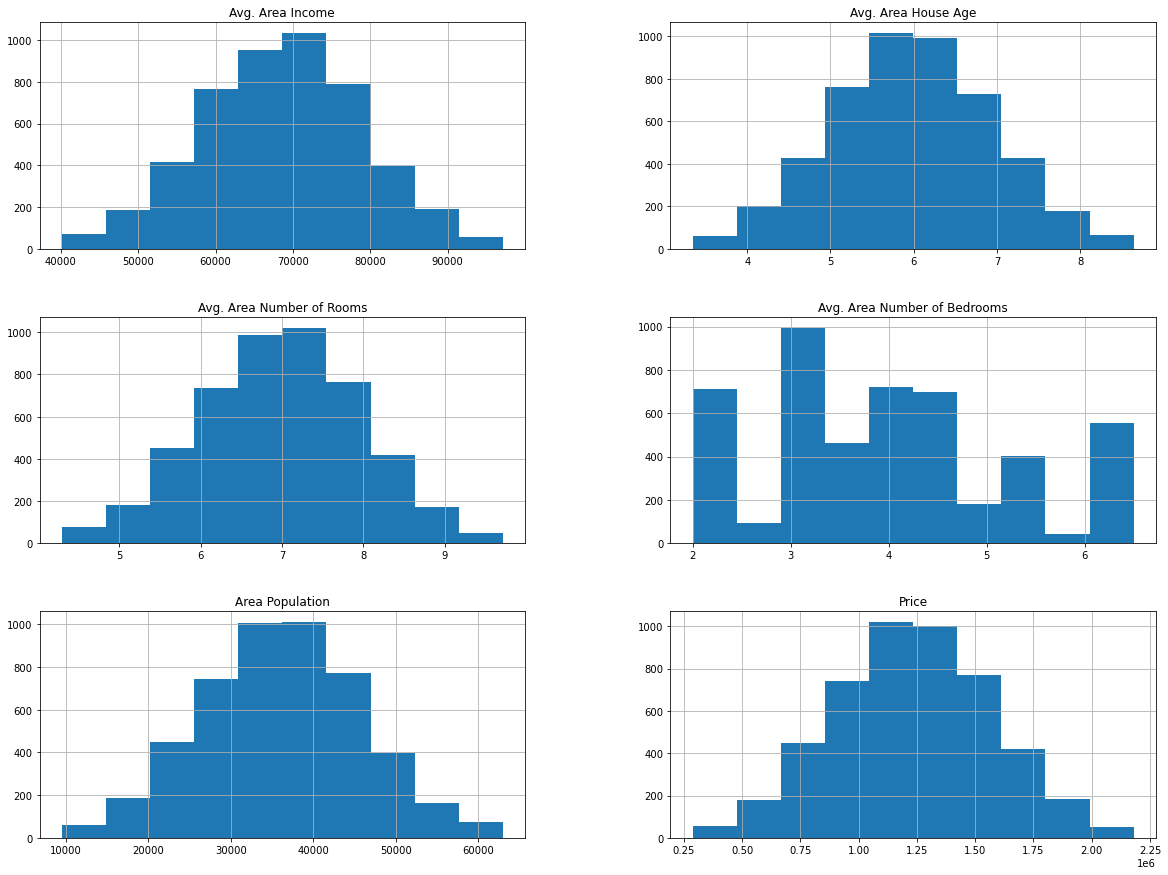

In [7]:
# Histogram
graph  = df.select_dtypes(include = ['int32','int64','float'])
graph.hist(figsize = (20,15))
plt.show
# # Scatter Plot:
# plt.scatter(df['Independent variable'],df['Dependent variabel'])


In [81]:



# Here we are trying to predict the housing prices which is the dependent variable based on Area Income, 
# Area House Age, Number of rooms, Population





<AxesSubplot:>

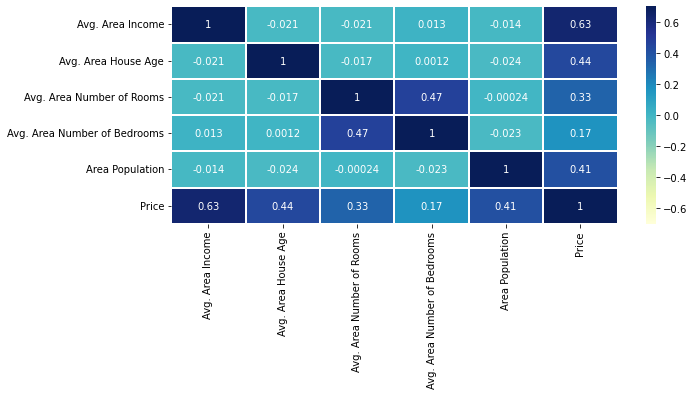

In [8]:
# Correlation
corr_matrix = df.corr()
plt.subplots(figsize = (10,4))
sns.heatmap(corr_matrix,vmin = -.7, vmax = .7, annot = True, linewidth = 0.3,cmap = 'YlGnBu' )


Here the is no high correlation amoung the variables 

In [9]:
# Add dependent feature to y and independent features to x
y = df['Price']
x = df.drop(['Price','Address'], axis = 1)

In [10]:
# Splitting into training and testing

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size = .25)
# Scaling using standard scaling
from sklearn import preprocessing
standardisation  = preprocessing.StandardScaler()
x_test = standardisation.fit_transform(x_test)
x_train = standardisation.fit_transform(x_train)



In [11]:
# Regression Modelling
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)

In [12]:
print(f'Intercept for the model is {model.intercept_}')

Intercept for the model is 1231937.1642710178


In [34]:
#The  coefficients for each independent or predictor variable
model.coef_

array([221992.92389313, 161247.52780979, 118422.72716152,    511.22703061,
       144046.04062495])

In [26]:
# Regression Score
print(model.score(x_test, y_test))


0.9106926821266688


Regression score is 0.910 which shows our model has high predictive power

In [17]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(f'Mean Absolute Error is {mean_absolute_error(y_test,predictions)}.')
print(f'Mean Squared Error is {mean_squared_error(y_test,predictions)}.')
print(f'Root Mean Squared Error is {mean_squared_error(y_test,predictions,squared = False)}.')

Mean Absolute Error is 81495.38677952909.
Mean Squared Error is 10405206651.39478.
Root Mean Squared Error is 102005.91478632393.


In [33]:
predictions

array([1299844.5291252 , 1047539.36085957,  973400.43760906, ...,
       1429341.28993606, 1084084.38553197, 1442249.60615983])

Text(0.5, 1.0, 'Regression Model')

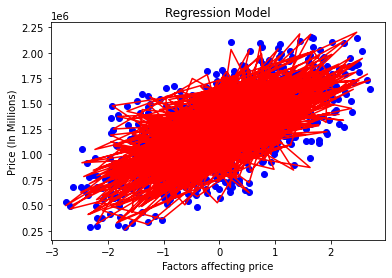

In [49]:
plt.scatter(x_test[:,0], y_test, color ='b')
plt.plot(x_test[:,0], predictions, color ='r')
plt.ylabel('Price (In Millions)')
plt.xlabel('Factors affecting price')
plt.title('Regression Model')


In [44]:
predictions

array([1299844.5291252 , 1047539.36085957,  973400.43760906, ...,
       1429341.28993606, 1084084.38553197, 1442249.60615983])

predictions = model.intercept_ + np.sum(model.coef_ * x_test, axis=1)


The above mentioned is the regression equation